
# Project: 泰坦尼克生存分析

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>RMS泰坦尼克号沉没是历史上最臭名昭着的沉船之一。1912年4月15日，在她的处女航中，泰坦尼克号在与冰山相撞后沉没，在2224名乘客和机组人员中造成1502人死亡。这场耸人听闻的悲剧震惊了国际社会，并为船舶制定了更好的安全规定。  
造成海难失事的原因之一是乘客和机组人员没有足够的救生艇。尽管幸存下沉有一些运气因素，但有些人比其他人更容易生存，例如妇女，儿童和上流社会。
>
>[kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行
%matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: 这一部分，将加载数据，检查清洁度，然后修剪和清洗数据集进行分析。

### General Properties

In [2]:
# 数据加载
df = pd.read_csv('titanic_dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


| 特征 | 描述 | 值|
| - | - | - |
| survival | 生存           | 0 = No, 1 = Yes |
| pclass   | 票类别-社会地位  | 1 = 1st, 2 = 2nd, 3 = 3rd |  
| sex      | 性别           | |
| Age      | 年龄           | |    
| sibsp    | 兄弟/姐妹/配偶   | | 
| parch    | 父母/孩子的数量 | |
| ticket   | 票号           | |   
| fare     | 乘客票价       | |  
| cabin    | 客舱号码       | |    
| embarked | 登船港口       | C=Cherbourg, Q=Queenstown, S=Southampton |

In [3]:
# 数据形状
df.shape

(891, 12)

有891名乘客和12列

In [4]:
# 以下是一些摘要统计数据
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


通过观察发现ID，名字，票号，客舱号码对生存与否并没有什么关系，丢弃这些没用的列

In [6]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### 整个数据框的直方图
与我们在摘要统计中看到的内容一致。
- 他们中的大多数人票价较低，偏向左边。
- 大多数乘客都是三等票。
- 大多数人单独 出行，没有和父母，孩子，兄弟姐妹或配偶一起来。
- 年龄也向左倾斜，大多数在20和40左右。
- 更多人没有幸存下来。

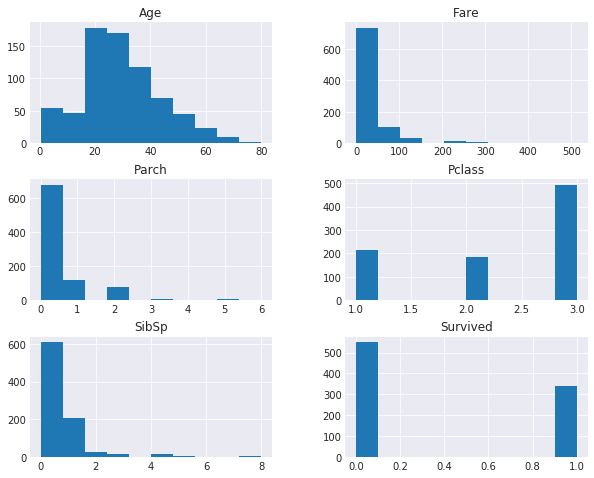

In [7]:
df.hist(figsize=(10,8));

### 数据清洗

此数据集一共有891行，年龄列只有714行，查看年龄为null的数据框，然后查看其直方图

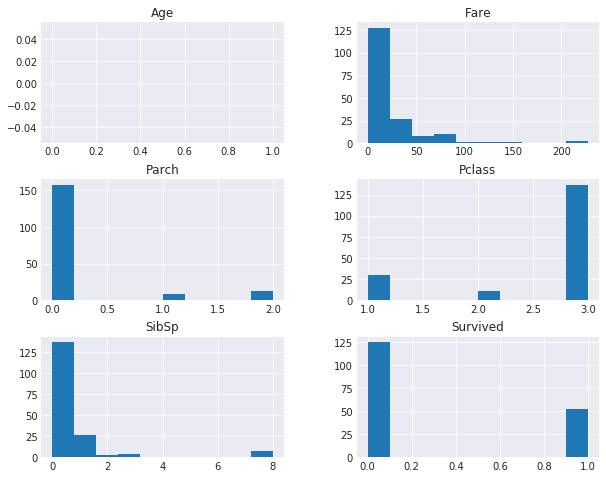

In [8]:
df[df.Age.isnull()].hist(figsize=(10,8));

Age列用均值填充空值

In [9]:
df.fillna(df.mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [10]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

使用登录最多的港口来填充登录港口的 `nan` 值

In [12]:

df['Embarked'].fillna('S', inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


<a id='eda'></a>
## 探索性数据分析

> **Tip**: 计算统计数据并创建可视化，目标是解决在简介部分提出的研究问题。

### Research Question 1
### 票价是否与生存有关？

In [14]:
survived = df.Survived == True
died = df.Survived == False

In [15]:
df.Fare[survived].mean()

48.39540760233917

In [16]:
df.Fare[died].mean()

22.117886885245877

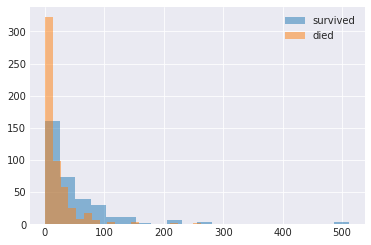

In [17]:
df.Fare[survived].hist(alpha=0.5, bins=20, label="survived");
df.Fare[died].hist(alpha=0.5, bins=20, label="died");
plt.legend();

票价越贵，幸存比例越高。

### Research Question 2
### 年龄是否与生存有关？

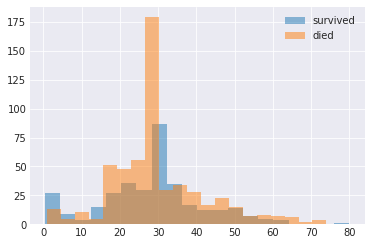

In [18]:
df.Age[survived].hist(alpha=0.5, bins=20, label="survived");
df.Age[died].hist(alpha=0.5, bins=20, label="died");
plt.legend();

小孩子比其他年龄段的生存机会更高，但除此之外，它们看起来并不太相关。

### Research Question 3
### 社会地位是否与生存有关？

In [19]:
df.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

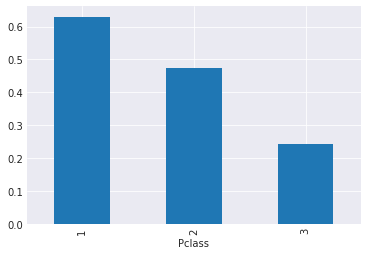

In [20]:
df.groupby('Pclass').Survived.mean().plot(kind="bar");

社会地位越高，越容易生存。

### Research Question 4
### 性别是否与生存有关？

In [21]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
df.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

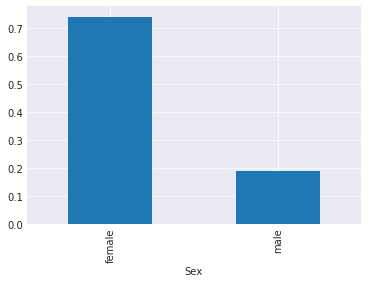

In [23]:
df.groupby('Sex').Survived.mean().plot(kind="bar");

In [24]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [25]:
df.query('Sex == "female"')['Fare'].median(), df.query('Sex == "male"')["Fare"].median()

(23.0, 10.5)

女性的票价比男性的更贵。

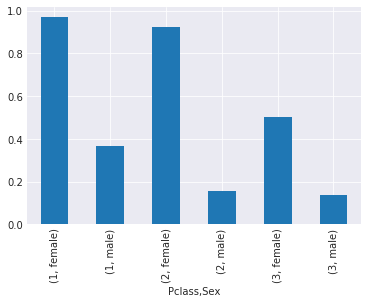

In [26]:
df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind='bar');

很明显，即使你按等级汇总，女性比男性更容易幸存。因此，性别与生存之间似乎存在着非常强烈的联系。

### Research Question 4
### 家庭关系是否与生存有关？

- 兄弟/姐妹/配偶

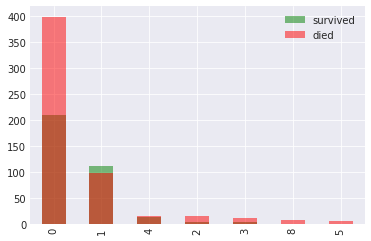

In [42]:
df.SibSp[survived].value_counts().plot(kind='bar', alpha=0.5, color='green', label='survived');
df.SibSp[died].value_counts().plot(kind='bar', alpha=0.5, color='red', label='died');
plt.legend();

- 父母/孩子

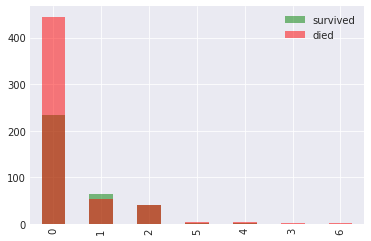

In [47]:
df.Parch[survived].value_counts().plot(kind='bar', alpha=0.5, color='green', label='survived');
df.Parch[died].value_counts().plot(kind='bar', alpha=0.5, color='red', label='died');
plt.legend();

同行人数越少，越容易幸存下来。

### Research Question 5
### 登船港口是否与生存有关？

In [29]:
df.Embarked[survived].value_counts()

S    219
C     93
Q     30
Name: Embarked, dtype: int64

In [30]:
df.Embarked[died].value_counts()

S    427
C     75
Q     47
Name: Embarked, dtype: int64

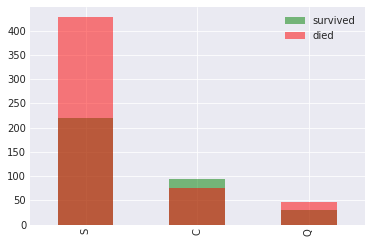

In [57]:
df.Embarked[survived].value_counts().plot(kind='bar', alpha=0.5, color='green', label='survived');
df.Embarked[died].value_counts().plot(kind='bar', alpha=0.5, color='red', label='died');
plt.legend();

Cherbourg港口登船的乘客幸存的比死亡的多, Queenstown和Southampton港口死亡的多余幸存。

<a id='conclusions'></a>
## 结论

- 票价是否与生存有关？
  - 票价越贵，幸存比例越高。

- 年龄是否与生存有关？  
    - 子比其他年龄段的生存机会更高，但除此之外，它们看起来并不太相关。

- 社会地位是否与生存有关？  
    - 地位越高，越容易生存。

- 性别是否与生存有关？
    - 女性比男性更容易幸存。

- 家庭关系是否与生存有关？
     - 同行人数越少，越容易幸存。

- 登船港口是否与生存有关？
     - Cherbourg港口登船的乘客幸存的比死亡的多；
     - Queenstown和Southampton港口死亡的多余幸存。

In [32]:
from subprocess import call
call('python'), '-m', 'nbconvert', 'titanic_data_analysis.ipynb'

(0, '-m', 'nbconvert', 'titanic_data_analysis.ipynb')